In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


colbert_df = pd.read_csv('../data/chatgpt-27062023-positions-colbert.csv')
qe_dph_df = pd.read_csv('../data/chatgpt-27062023-positions-IterDict.csv')

# replace position -1 with nan
colbert_df['position'] = colbert_df['position'].replace(-1, np.nan)
qe_dph_df['position'] = qe_dph_df['position'].replace(-1, np.nan)

# reaname 'OA_SFT_Llama_30B_7_clean_queries' to 'ColBERT'
colbert_df['llm'] = colbert_df['llm'].replace('OA_SFT_Llama_30B_7_clean_queries', 'OA_SFT_Llama_30B')
qe_dph_df['llm'] = qe_dph_df['llm'].replace('OA_SFT_Llama_30B_7_clean_queries', 'OA_SFT_Llama_30B')

# rename Falcon-7b-instruct_long
colbert_df['llm'] = colbert_df['llm'].replace('Falcon-7b-instruct_long', 'falcon7b_instruct')
qe_dph_df['llm'] = qe_dph_df['llm'].replace('Falcon-7b-instruct_long', 'falcon7b_instruct')

# add new column position_capped_50
colbert_df['position_capped_50'] = colbert_df['position'].apply(lambda x: min(x, 50))
qe_dph_df['position_capped_50'] = qe_dph_df['position'].apply(lambda x: min(x, 50))

In [121]:
# for each row, compare the position between colbert and qe_dph and calculate the difference
colbert_df['position_diff'] = colbert_df['position'] - qe_dph_df['position']


In [122]:
# get the rows with big difference
colbert_df['qe_dph_position'] = qe_dph_df['position']
colbert_df['position_diff_abs'] = colbert_df['position_diff'].abs()
colbert_df = colbert_df.sort_values(by=['position_diff_abs'], ascending=True)
colbert_df.head(10)

,qid,query,llm,docno,position,chatgpt_answer,best_answer_if_not_llm,position_capped_50,position_diff,qe_dph_position,position_diff_abs
372,118,stage 4 triple negative breast cancer treatment,chatgpt_clean_queries,chatgpt_clean_queries118,2.0,Stage 4 triple negative breast cancer is an ad...,NaN,2.0,0.0,2.0,0.0
446,133,"psoriasis psoariatic arthritis, lump in armpit",OA_SFT_Llama_30B,OA_SFT_Llama_30B_7_clean_queries133,4.0,This search query is looking for information o...,NaN,4.0,0.0,4.0,0.0
259,98,most common complications in pregnancy,OA_SFT_Llama_30B,OA_SFT_Llama_30B_7_clean_queries98,2.0,Some of the most common complications that can...,NaN,2.0,0.0,2.0,0.0
234,95,Reading problems in MS,falcon7b_prompt,falcon7b_prompt95,2.0,Multiple sclerosis (MS) is a chronic autoimmu...,NaN,2.0,0.0,2.0,0.0
77,54,What does multiple sclerosis diagnosis include...,chatgpt,chatgpt54,0.0,A multiple sclerosis diagnosis typically inclu...,NaN,0.0,0.0,0.0,0.0
225,94,When will I start to feel better with multiple...,falcon7b_prompt,falcon7b_prompt94,18.0,The duration of recovery from multiple sclero...,NaN,18.0,0.0,18.0,0.0
222,94,When will I start to feel better with multiple...,falcon7b_instruct,Falcon-7b-instruct_long94,1.0,Unfortunately there is no easy answer to how...,NaN,1.0,0.0,1.0,0.0
217,93,Does multiple sclerosis relate to sleeping pro...,falcon40b_instruct,falcon40b_instruct93,4.0,There is a connection between multiple scleros...,NaN,4.0,0.0,4.0,0.0
211,92,causes of fatigue in MS,chatgpt_clean_queries,chatgpt_clean_queries92,1.0,As an AI language model I don't experience fa...,NaN,1.0,0.0,1.0,0.0
185,83,Why get episode diagnosed by a doctor as a rel...,chatgpt,chatgpt83,1.0,As an AI language model I do not have persona...,NaN,1.0,0.0,1.0,0.0


In [123]:
# calculate number of words in column 'chatgpt_answer'
colbert_df['answer_num_words'] = colbert_df['chatgpt_answer'].str.split().str.len()
qe_dph_df['answer_num_words'] = qe_dph_df['chatgpt_answer'].str.split().str.len()

In [124]:
# group by llm and get mean and std of position, as well as count of value 0.0 in position

colbert_df_grouped = colbert_df.groupby('llm').agg({'position': ['mean', 'std'], 'answer_num_words': ['mean', 'std'], 'position_capped_50': ['mean', 'std']})
colbert_df_grouped['position_0_count'] = colbert_df[colbert_df['position'] == 0.0].groupby('llm').agg({'position': 'count'})
qe_dph_df_grouped = qe_dph_df.groupby('llm').agg({'position': ['mean', 'std'], 'answer_num_words': ['mean', 'std'], 'position_capped_50': ['mean', 'std']})
qe_dph_df_grouped['position_0_count'] = qe_dph_df[qe_dph_df['position'] == 0.0].groupby('llm').agg({'position': 'count'})

# rename columns
colbert_df_grouped.columns = ['_'.join(col) for col in colbert_df_grouped.columns.values]
qe_dph_df_grouped.columns = ['_'.join(col) for col in qe_dph_df_grouped.columns.values]

In [125]:
colbert_df_grouped.head(10)

,position_mean,position_std,answer_num_words_mean,answer_num_words_std,position_capped_50_mean,position_capped_50_std,position_0_count_
llm,,,,,,,
OA_SFT_Llama_30B,151.541667,430.340487,171.981818,94.928724,19.229167,19.562491,2
chatgpt,46.236364,184.884845,137.636364,67.928438,6.600000,12.969480,9
chatgpt_clean_queries,26.800000,92.237897,140.509091,62.012506,7.345455,13.989703,6
falcon40b_instruct,219.571429,816.513532,51.160000,28.239038,6.642857,12.804004,5
falcon40b_prompt,11.527273,22.087247,140.272727,73.422535,9.727273,13.879714,3
falcon7b_instruct,105.660000,382.531824,120.618182,115.834091,8.940000,14.627916,14
falcon7b_prompt,3.927273,3.843487,131.400000,76.608094,3.927273,3.843487,9
open-llama-13b,48.250000,148.649064,257.200000,117.239135,18.423077,19.192877,5
open-llama-13b_k50,158.905660,316.018638,240.763636,113.078793,26.716981,20.937064,1


In [126]:
qe_dph_df_grouped.head(10)    

,position_mean,position_std,answer_num_words_mean,answer_num_words_std,position_capped_50_mean,position_capped_50_std,position_0_count_
llm,,,,,,,
OA_SFT_Llama_30B,143.377778,191.157038,171.981818,94.928724,34.066667,20.083236,1
chatgpt,40.169811,110.961833,137.636364,67.928438,15.320755,20.358115,5
chatgpt_clean_queries,39.442308,111.611970,140.509091,62.012506,17.192308,20.143640,8
falcon40b_instruct,65.153846,118.567000,51.160000,28.239038,29.589744,20.573000,1
falcon40b_prompt,86.462963,149.797185,140.272727,73.422535,31.166667,20.739853,4
falcon7b_instruct,59.446809,104.224634,120.618182,115.834091,24.638298,20.236026,2
falcon7b_prompt,53.163636,123.780685,131.400000,76.608094,19.800000,19.174057,2
open-llama-13b,75.921569,131.519252,257.200000,117.239135,21.490196,22.446712,10
open-llama-13b_k50,128.875000,175.825061,240.763636,113.078793,31.562500,20.755831,2


In [127]:
# only keep OA_SFT_Llama_30B, chatgpt_clean_queries, falcon40b_prompt, falcon7b_prompt and rename them to Llama, ChatGPT, Falcon-40b, Falcon-7b
colbert_df_grouped = colbert_df_grouped.loc[['OA_SFT_Llama_30B', 'chatgpt_clean_queries', 'falcon40b_prompt', 'falcon7b_prompt']]
colbert_df_grouped = colbert_df_grouped.rename(index={'OA_SFT_Llama_30B': 'Llama', 'chatgpt_clean_queries': 'ChatGPT', 'falcon40b_prompt': 'Falcon-40b', 'falcon7b_prompt': 'Falcon-7b'})
qe_dph_df_grouped = qe_dph_df_grouped.loc[['OA_SFT_Llama_30B', 'chatgpt_clean_queries', 'falcon40b_prompt', 'falcon7b_prompt']]
qe_dph_df_grouped = qe_dph_df_grouped.rename(index={'OA_SFT_Llama_30B': 'Llama', 'chatgpt_clean_queries': 'ChatGPT', 'falcon40b_prompt': 'Falcon-40b', 'falcon7b_prompt': 'Falcon-7b'})
# change order to ChatGPT, Llama, Falcon-7b, Falcon-40b
colbert_df_grouped = colbert_df_grouped.reindex(['ChatGPT', 'Llama', 'Falcon-7b', 'Falcon-40b'])
qe_dph_df_grouped = qe_dph_df_grouped.reindex(['ChatGPT', 'Llama', 'Falcon-7b', 'Falcon-40b'])


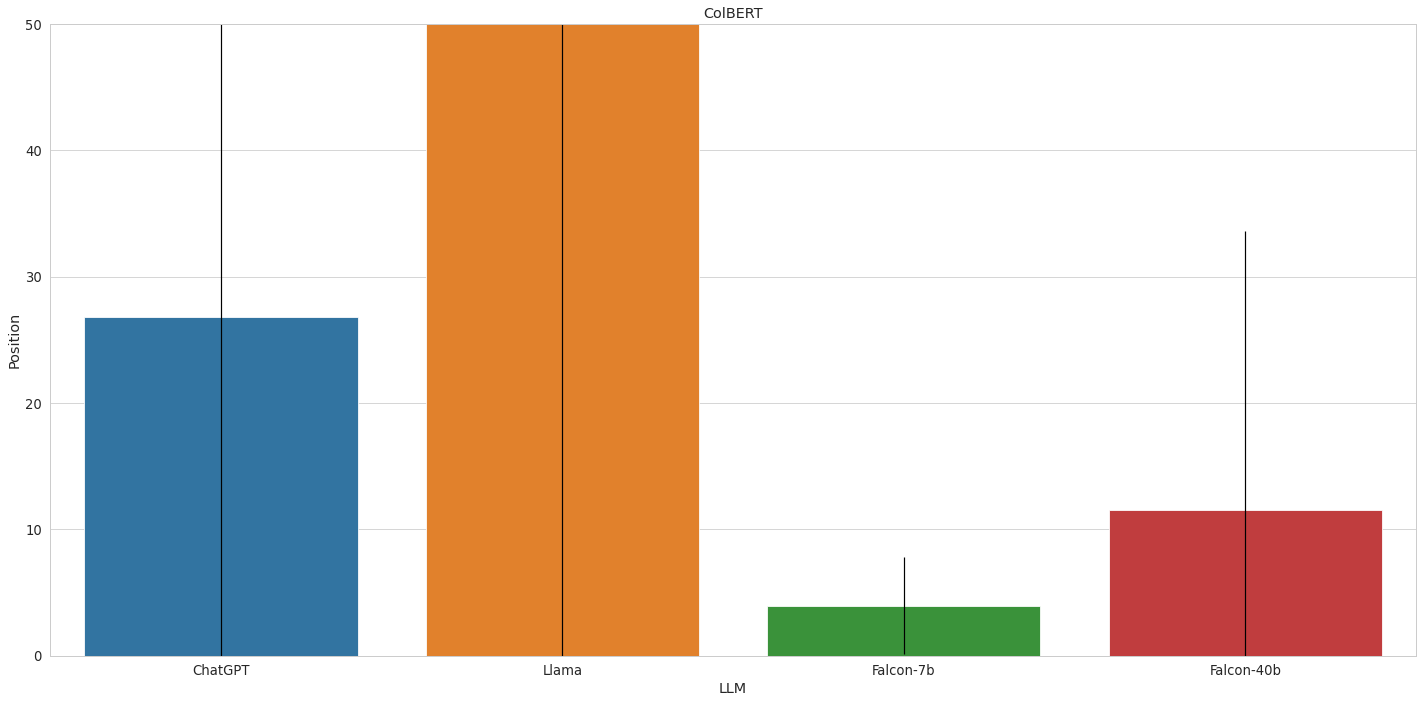

In [128]:
# plot positions for each dataframe
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.barplot(x=colbert_df_grouped.index, y='position_mean', data=colbert_df_grouped, yerr=colbert_df_grouped['position_std'])
ax.set_title('ColBERT')
ax.set_xlabel('LLM')
ax.set_ylabel('Position')
# set y axis to start at 0 and end at 500
ax.set_ylim(0, 50)
# fix x axis labels being cut off and overlapping

plt.tight_layout()

plt.show()

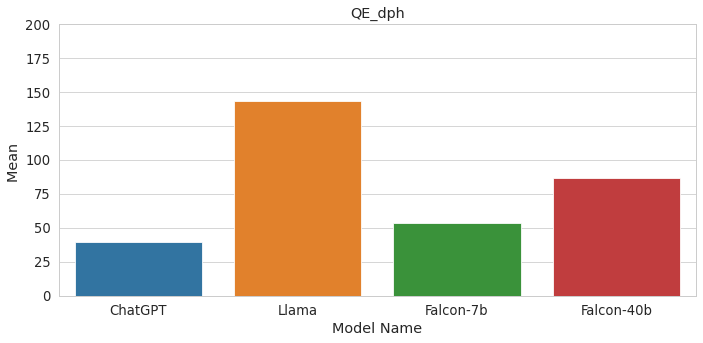

In [129]:
# same plot for qe_dph
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(10, 5))
#
ax = sns.barplot(x=qe_dph_df_grouped.index, y='position_mean', data=qe_dph_df_grouped)
ax.set_title('QE_dph')
ax.set_xlabel('Model Name')
ax.set_ylabel('Mean ')
# set y axis to start at 0 and end at 500
ax.set_ylim(0, 200)
# fix x axis labels being cut off and overlapping
plt.tight_layout()
plt.show()

In [130]:
qe_dph_df_grouped['Billion Parameters'] = [175, 30, 7, 40]

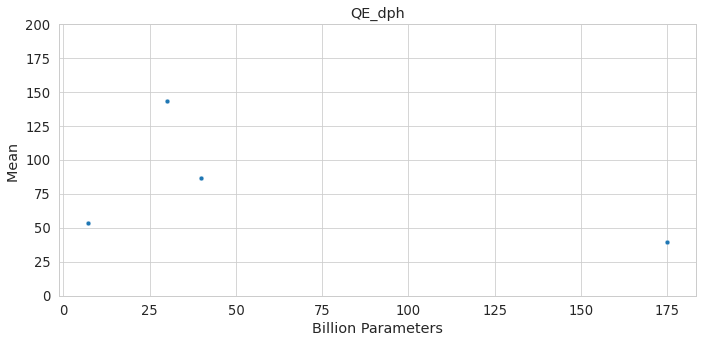

In [131]:
# plot position_mean against Billion Parameters
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(10, 5))
#
ax = sns.scatterplot(x='Billion Parameters', y='position_mean', data=qe_dph_df_grouped)
ax.set_title('QE_dph')
ax.set_xlabel('Billion Parameters')
ax.set_ylabel('Mean ')
# set y axis to start at 0 and end at 200
ax.set_ylim(0, 200)
# fix x axis labels being cut off and overlapping
plt.tight_layout()
plt.show()

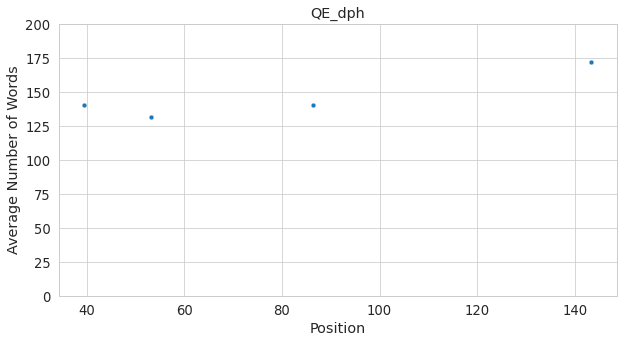

In [132]:
# plot average number of words vs position
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
fig, ax = plt.subplots(figsize=(10, 5))
#
ax = sns.scatterplot(x='position_mean', y='answer_num_words_mean', data=qe_dph_df_grouped)
ax.set_title('QE_dph')
ax.set_xlabel('Position')
ax.set_ylabel('Average Number of Words')
# set y axis to start at 0 and end at 200
ax.set_ylim(0, 200)
# fix x axis labels being cut off and overlapping
plt.show()


In [137]:
# remove std, clean up column names, move billion parameters to the beginning
qe_dph_df_out = qe_dph_df_grouped.drop(columns=['position_std', 'answer_num_words_std', 'position_capped_50_std'])
qe_dph_df_out = qe_dph_df_out.rename(columns={'position_mean': 'Average Position', 'position_capped_50_mean': 'Average Position (Capped at 50)', 'answer_num_words_mean': 'Average Number of Words', 'position_0_count_': 'Number of Top Answers', 'Billion Parameters': 'Billion Parameters'})
# make index into a column called Model Name
qe_dph_df_out['Model Name'] = qe_dph_df_out.index
# reset index
qe_dph_df_out = qe_dph_df_out.reset_index(drop=True)
qe_dph_df_out = qe_dph_df_out[['Model Name', 'Billion Parameters', 'Average Position', 'Average Position (Capped at 50)', 'Number of Top Answers', 'Average Number of Words']]
qe_dph_df_out

,Model Name,Billion Parameters,Average Position,Average Position (Capped at 50),Number of Top Answers,Average Number of Words
0,ChatGPT,175,39.442308,17.192308,8,140.509091
1,Llama,30,143.377778,34.066667,1,171.981818
2,Falcon-7b,7,53.163636,19.800000,2,131.400000
3,Falcon-40b,40,86.462963,31.166667,4,140.272727


In [ ]:
# get all results of chatgpt_clean_queries, order by position
chatgpt_clean_queries_df = result_df[result_df['llm'] == 'chatgpt_clean_queries']
chatgpt_clean_queries_df = chatgpt_clean_queries_df.sort_values(by=['position'])
chatgpt_clean_queries_df

NameError: name 'result_df' is not defined

In [ ]:
# get text result of query 267
chatgpt_clean_queries_df[chatgpt_clean_queries_df['qid'] == 114]['chatgpt_answer'].values[0]

'1. Intense and unstable emotional experiences  2. Extreme fear of abandonment or rejection  3. Unstable and intense interpersonal relationships  4. Impulsive behavior (substance abuse  binge eating  reckless driving)  5. Self-harm or suicidal behavior  6. Chronic feelings of emptiness  7. Unstable self-image or sense of identity  8. Intense anger and difficulty controlling emotions  9. Paranoia or dissociation  10. Inability to maintain a stable job or secure living situation.'